In [23]:
# Download dataset

!kaggle datasets download -d muhammadshahidazeem/customer-churn-dataset -p .data/ --unzip

# Load dataset
import pandas as pd

churn_train = pd.read_csv('.data/customer_churn_dataset-training-master.csv')
churn_test = pd.read_csv('.data/customer_churn_dataset-testing-master.csv')
print("Train:", churn_train.shape, "Test:", churn_test.shape)

Dataset URL: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
License(s): GPL-2.0
100%|██████████████████████████████████████| 6.66M/6.66M [00:01<00:00, 5.30MB/s]
100%|██████████████████████████████████████| 6.66M/6.66M [00:01<00:00, 4.75MB/s]
Train: (440833, 12) Test: (64374, 12)


In [24]:
churn_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [25]:
churn_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [26]:

# Remove missing values (this is why churn_train showed up as floats, it had missing values)
churn_train = churn_train.dropna()
churn_test = churn_test.dropna()

In [27]:
# Drop CustomerID column
churn_train = churn_train.drop(columns=['CustomerID'])
churn_test = churn_test.drop(columns=['CustomerID'])

In [28]:
# Keep 'Churn' as an integer, all other numerical columns as floats
churn_train['Churn'] = churn_train['Churn'].astype(int)
churn_test['Churn'] = churn_test['Churn'].astype(int)

# Convert all other non-categorical columns to floats
for col in churn_train.columns:
    if col != 'Churn' and churn_train[col].dtype != 'object':
        churn_train[col] = churn_train[col].astype(float)
        churn_test[col] = churn_test[col].astype(float)


In [31]:
print("Train:\n", churn_train.dtypes)
print("Test:\n", churn_test.dtypes)

Train:
 Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                  int64
dtype: object
Test:
 Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                  int64
dtype: object


In [33]:
# Scale all numerical columns, except 'Churn'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in churn_train.columns:
    if col != 'Churn' and churn_train[col].dtype != 'object':
        churn_train[col] = scaler.fit_transform(churn_train[[col]])
        churn_test[col] = scaler.transform(churn_test[[col]])

In [34]:
churn_train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,-0.753326,Female,0.448760,-0.210511,0.454549,0.609620,Standard,Annual,1.247427,0.293052,1
1,2.059646,Female,1.028278,-1.724562,2.083100,-0.601319,Basic,Monthly,-0.309865,-0.986584,1
2,1.255940,Female,-1.000036,-1.375166,0.780259,0.609620,Basic,Quarterly,-1.854698,-1.335575,1
3,1.497051,Male,0.390808,0.604748,1.105969,-0.722413,Standard,Monthly,-0.978462,1.689018,1
4,-1.315921,Male,0.043097,0.488282,0.454549,-0.601319,Basic,Monthly,-0.060698,0.642043,1
...,...,...,...,...,...,...,...,...,...,...,...
440828,0.211121,Male,1.318037,-0.094045,-0.848291,-1.206788,Premium,Annual,0.352005,-0.753923,0
440829,-1.155179,Female,-1.347747,-0.326976,-0.848291,0.851808,Premium,Annual,0.472436,-1.451906,0
440830,-1.074809,Male,0.216952,1.303541,-0.848291,-0.964600,Standard,Quarterly,1.435589,-0.637592,0
440831,-0.914068,Male,1.375989,-0.210511,-0.522581,-1.570070,Standard,Quarterly,-0.120706,-1.451906,0


In [35]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in churn_train.columns:
    if churn_train[column].dtype == type(object):
        churn_train[column] = label_encoder.fit_transform(churn_train[column])
        churn_test[column] = label_encoder.fit_transform(churn_test[column])

In [36]:

# Check the data types of the columns
churn_train.dtypes

Age                  float64
Gender                 int64
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type      int64
Contract Length        int64
Total Spend          float64
Last Interaction     float64
Churn                  int64
dtype: object

In [37]:

# Check the data types of the columns
churn_test.dtypes

Age                  float64
Gender                 int64
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type      int64
Contract Length        int64
Total Spend          float64
Last Interaction     float64
Churn                  int64
dtype: object

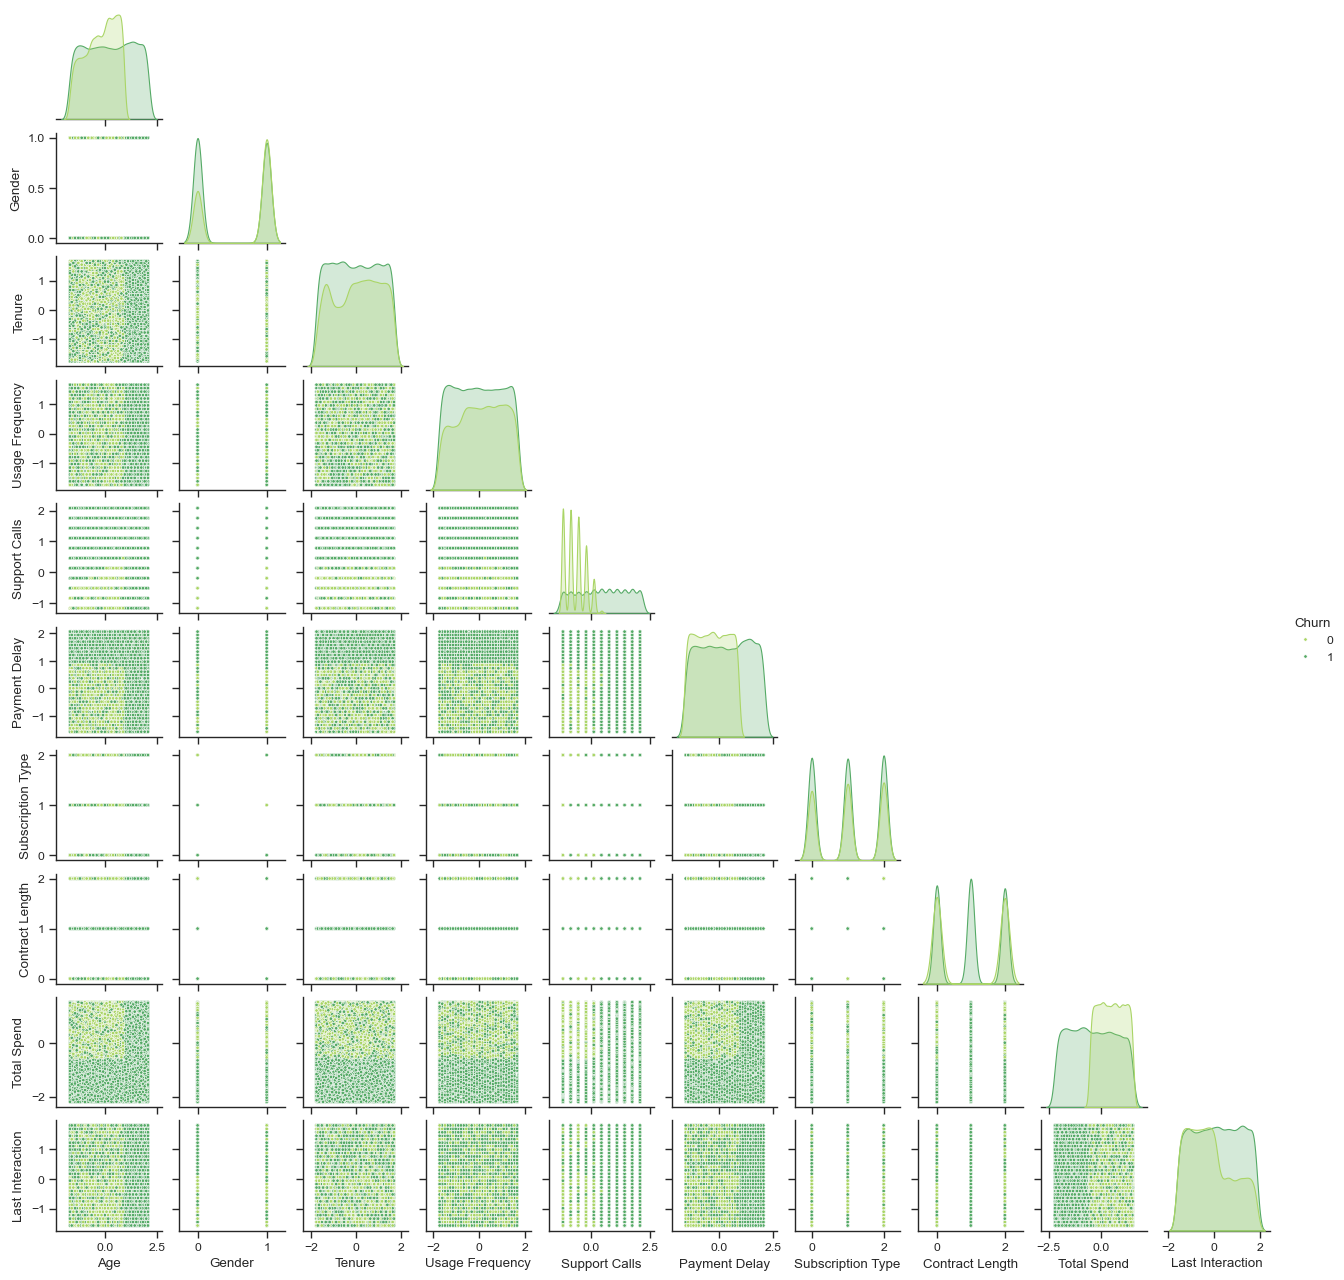

In [38]:

# Pairplot of the dataset for non-categorical features, with Churn as the target (stick to a sample for performance)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context="paper", style="ticks")  # Set the style of the visualization
pairplot = sns.pairplot(churn_train.sample(n=50000, random_state=42), hue="Churn", palette="summer_r", corner=True, height=1.3, markers=[".", "."])
plt.show()

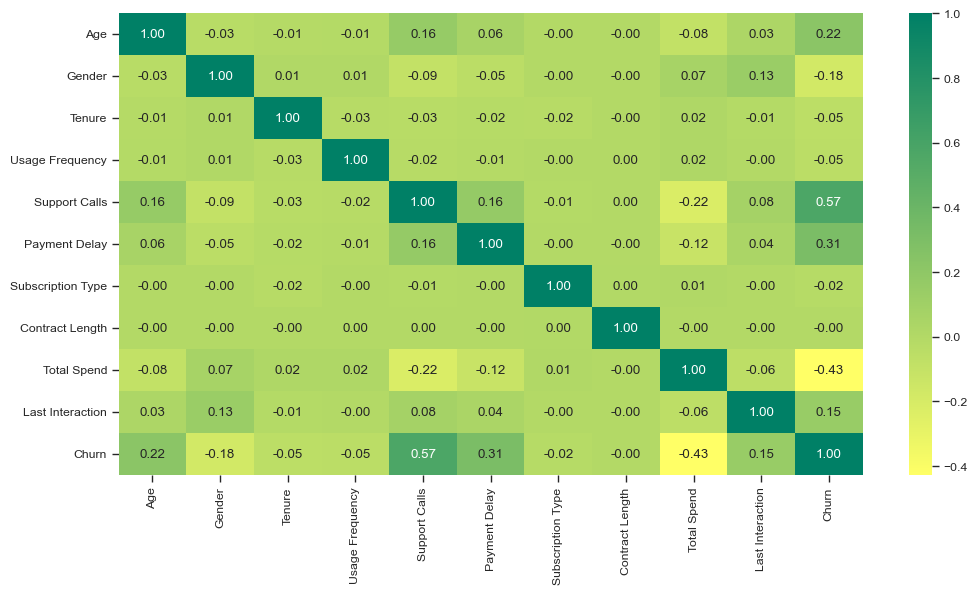

In [39]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 6))
correlation = churn_train.corr()
heatmap = sns.heatmap(correlation, annot=True, cmap="summer_r", fmt=".2f")
plt.show()

Churn
1    14178
0    10822
Name: count, dtype: int64
Churn
0    13158
1    11842
Name: count, dtype: int64


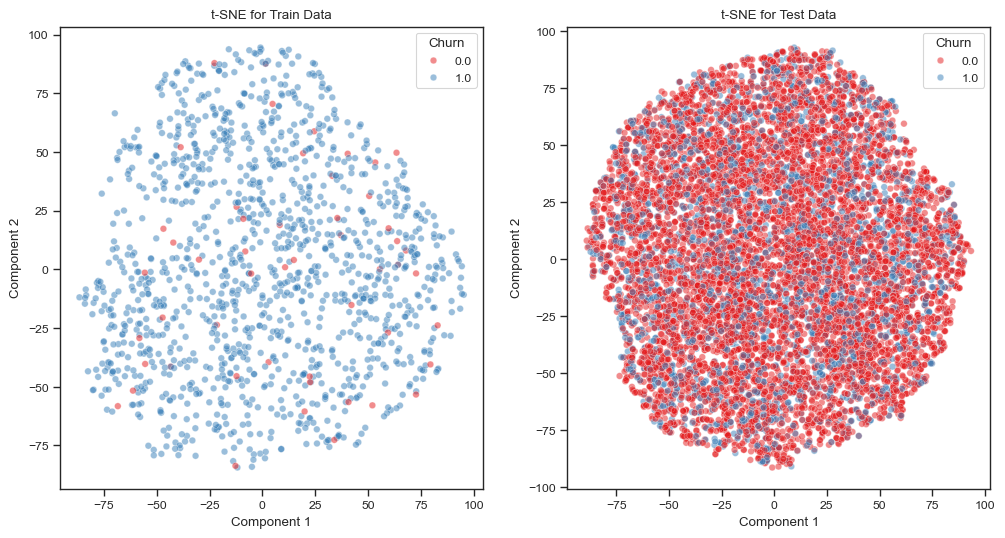

In [40]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Sample a subset for t-SNE, ensure an equal number of samples for both train and test
_churn_train, _ = train_test_split(
    churn_train, test_size=len(churn_train) - 25000, stratify=churn_train['Churn'], random_state=42
)

# Sample the testing dataset
_churn_test, _ = train_test_split(
    churn_test, test_size=len(churn_test) - 25000, stratify=churn_test['Churn'], random_state=42
)

print(_churn_train['Churn'].value_counts())
print(_churn_test['Churn'].value_counts())

# Fit and transform t-SNE on the train dataset
tsne = TSNE(n_components=2, random_state=42)
tsne_data_train = tsne.fit_transform(_churn_train.drop(columns=["Churn"]))

tsne_df_train = pd.DataFrame(data=tsne_data_train, columns=["Component 1", "Component 2"])
tsne_df_train["Churn"] = _churn_train["Churn"]

# Fit and transform t-SNE on the test dataset
tsne_data_test = tsne.fit_transform(_churn_test.drop(columns=["Churn"]))

tsne_df_test = pd.DataFrame(data=tsne_data_test, columns=["Component 1", "Component 2"])
tsne_df_test["Churn"] = _churn_test["Churn"]

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for train data
sns.scatterplot(ax=axes[0], data=tsne_df_train, x="Component 1", y="Component 2", hue="Churn", palette="Set1", alpha=0.5)
axes[0].set_title('t-SNE for Train Data')

# Plot for test data
sns.scatterplot(ax=axes[1], data=tsne_df_test, x="Component 1", y="Component 2", hue="Churn", palette="Set1", alpha=0.5)
axes[1].set_title('t-SNE for Test Data')

plt.show()


In [41]:
# Count the number of churned and non-churned samples
print(churn_train['Churn'].value_counts())
print(churn_test['Churn'].value_counts())

Churn
1    249999
0    190833
Name: count, dtype: int64
Churn
0    33881
1    30493
Name: count, dtype: int64


In [51]:

# Concatenate churn_train and churn_test
churn_data = pd.concat([churn_train, churn_test], ignore_index=True)

# Separate features and target variable
X = churn_data.drop(columns=['Churn'])
y = churn_data['Churn']

# Split the data into balanced train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# Verify the proportions of the 'Churn' column in the train and test sets
print("Train set 'Churn' value counts:")
print(y_train.value_counts(normalize=True))
print("Test set 'Churn' value counts:")
print(y_test.value_counts(normalize=True))

#X_train = churn_train.drop(columns=['Churn'])
#y_train = churn_train['Churn']

#X_test = churn_test.drop(columns=['Churn'])
#y_test = churn_test['Churn']

#print("X_train:", X_train.shape, "y_train:", y_train.shape)
#print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (404164, 10) y_train: (404164,)
X_test: (101042, 10) y_test: (101042,)
Train set 'Churn' value counts:
Churn
1    0.555203
0    0.444797
Name: proportion, dtype: float64
Test set 'Churn' value counts:
Churn
1    0.555205
0    0.444795
Name: proportion, dtype: float64


In [52]:
# Use Random Forest Classifier to train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the model
rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(X_train, y_train)

# Show the training accuracy
training_accuracy = rfc.score(X_train, y_train)
print("Training accuracy:", training_accuracy)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model, print a classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Training accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     44943
           1       0.90      1.00      0.95     56099

    accuracy                           0.94    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.94      0.94    101042



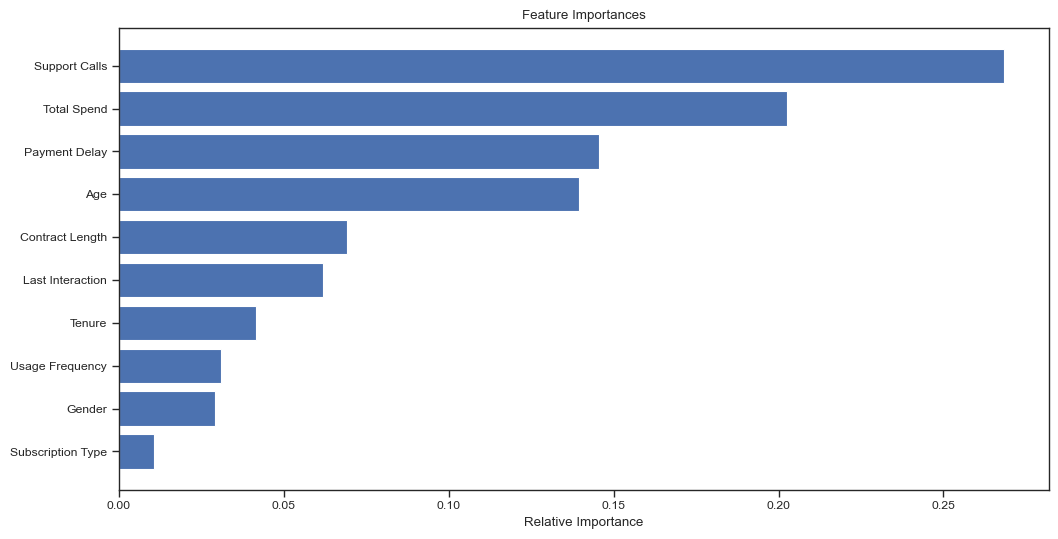

In [53]:
import numpy as np

# Plot the feature importances, sorted in ascending order
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [54]:
# Use a Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Show the training accuracy

training_accuracy = lr.score(X_train, y_train)
print("Training accuracy:", training_accuracy)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model, print a classification report
print(classification_report(y_test, y_pred))

Training accuracy: 0.8197687077522986
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     44943
           1       0.84      0.83      0.84     56099

    accuracy                           0.82    101042
   macro avg       0.82      0.82      0.82    101042
weighted avg       0.82      0.82      0.82    101042



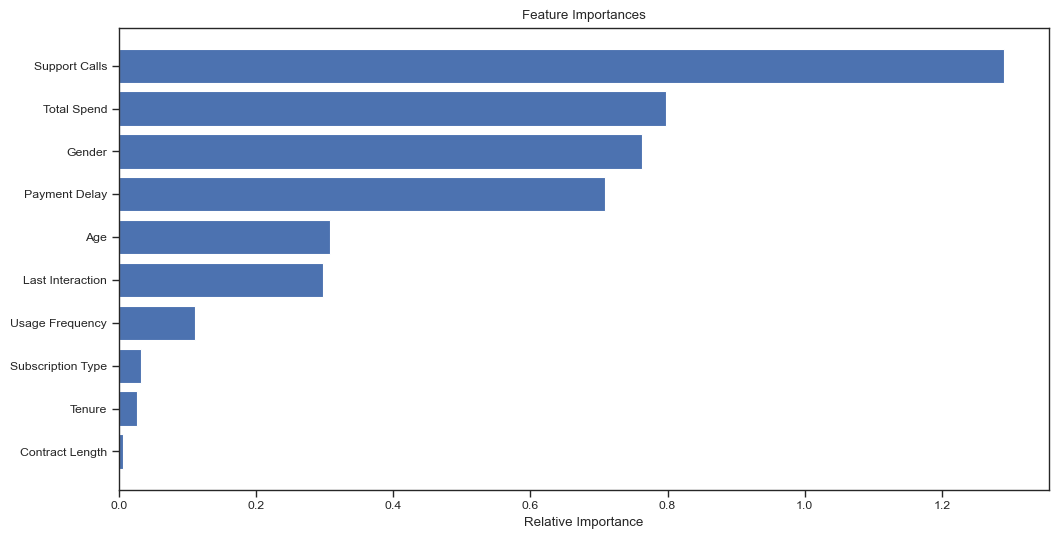

In [55]:
# Plot the feature importances, sorted in ascending order
importances = np.abs(lr.coef_[0])
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [56]:
# Use XGBoost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, random_state=42)
xgb.fit(X_train, y_train)

# Show the training accuracy
training_accuracy = xgb.score(X_train, y_train)
print("Training accuracy:", training_accuracy)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model, print a classification report
print(classification_report(y_test, y_pred))

Training accuracy: 0.943374471749092
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     44943
           1       0.90      0.99      0.94     56099

    accuracy                           0.93    101042
   macro avg       0.94      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



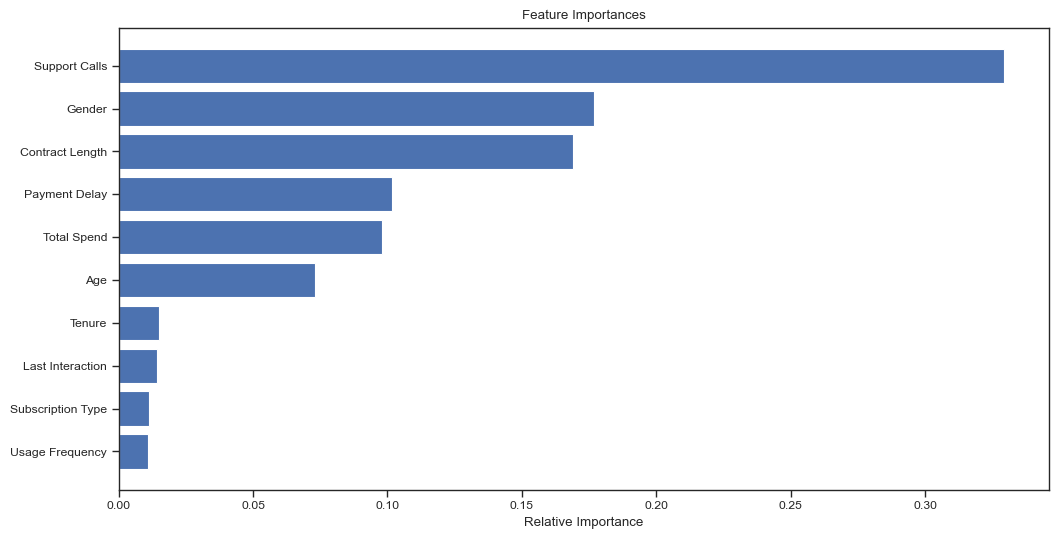

In [57]:
# Plot the feature importances, sorted in ascending order
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()